# Análisis exploratorio de datos (EDA)

### Importamos librerías y cargamos los archivos de entrada

In [65]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator

In [66]:
df_yellow = pd.read_parquet('../datasets/yellow_to_go_eda.parquet')

In [67]:
df_yellow.shape

(71649264, 11)

In [68]:
# Eliminar duplicados basados en todas las columnas
df_sin_duplicados = df_yellow.drop_duplicates()

# Visualizar el DataFrame sin duplicados
print("\nDataFrame sin duplicados:")
df_sin_duplicados.head()


DataFrame sin duplicados:


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,pickup_hour,duracion_viaje,pickup_date
0,1,2,3.80,1,142,236,1,21.95,0,1069,2022-01-01
1,1,1,2.10,1,236,42,1,13.30,0,504,2022-01-01
2,2,1,0.97,1,166,166,1,10.56,0,538,2022-01-01
3,2,1,1.09,1,114,68,2,11.80,0,602,2022-01-01
4,2,1,4.30,1,68,163,1,30.30,0,2252,2022-01-01


In [69]:
df_sin_duplicados.shape

(71645092, 11)

### Análisis columna passenger_count

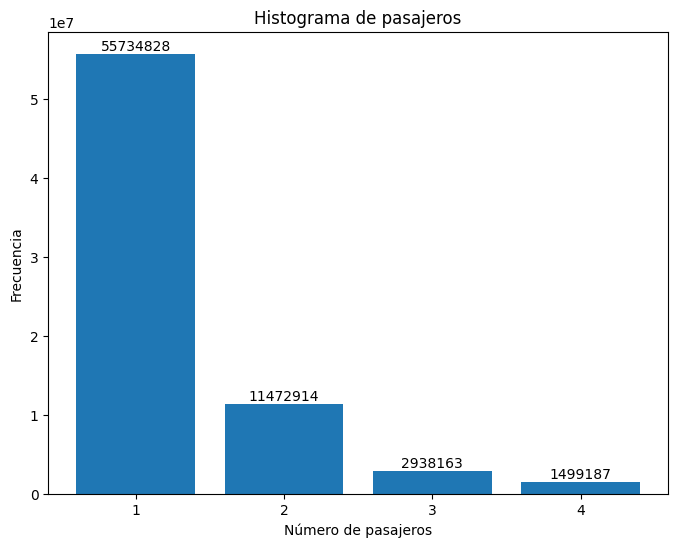

In [70]:
# Calcular la cantidad de ocurrencias de cada valor de passenger_count
conteo_pasajeros = df_sin_duplicados['passenger_count'].value_counts().reset_index()
conteo_pasajeros.columns = ['passenger_count', 'count']

# Crear el histograma utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(conteo_pasajeros['passenger_count'], conteo_pasajeros['count'])

# Agregar etiquetas de cantidad en cada barra con un salto de 1 en 1
for index, row in conteo_pasajeros.iterrows():
    plt.annotate(row['count'], xy=(row['passenger_count'], row['count']), ha='center', va='bottom')

# Configurar títulos y etiquetas de ejes
plt.title('Histograma de pasajeros')
plt.xlabel('Número de pasajeros')
plt.ylabel('Frecuencia')

# Establecer el eje x con valores enteros
plt.xticks(range(min(conteo_pasajeros['passenger_count']), max(conteo_pasajeros['passenger_count']) + 1))

# Mostrar el gráfico
plt.show()

### Revisión columna trip_distance

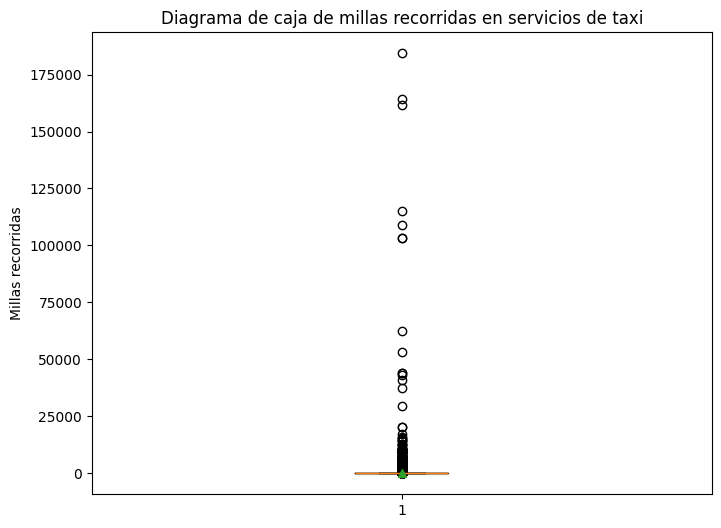

In [74]:
# Crear el diagrama de caja utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df_sin_duplicados['trip_distance'], showmeans=True)

# Configurar títulos y etiquetas de ejes
plt.title('Diagrama de caja de millas recorridas en servicios de taxi')
plt.ylabel('Millas recorridas')

# Mostrar el gráfico
plt.show()

In [76]:
df_sin_duplicados.drop(df_sin_duplicados[df_sin_duplicados['trip_distance'] < 0.5 ].index, inplace=True)
df_sin_duplicados.drop(df_sin_duplicados[df_sin_duplicados['trip_distance'] >  40 ].index, inplace=True)

In [77]:
# Calcular la media, mediana, desviación estándar, mínimo y máximo de la columna:  'trip_distance'
mean_seconds = df_sin_duplicados['trip_distance'].mean()
median_seconds = df_sin_duplicados['trip_distance'].median()
std_seconds = df_sin_duplicados['trip_distance'].std()
min_seconds = df_sin_duplicados['trip_distance'].min()
max_seconds = df_sin_duplicados['trip_distance'].max()

# Revisar los resultados
print("Minimo:", min_seconds)
print("Maximo:", max_seconds)
print("Media:", mean_seconds)
print("Mediana:", median_seconds)
print("Desviación estándar:", std_seconds)

Minimo: 0.5
Maximo: 40.0
Media: 3.6026960813694187
Mediana: 1.9
Desviación estándar: 4.476101588539747


In [78]:
df_sin_duplicados.shape

(68239094, 11)

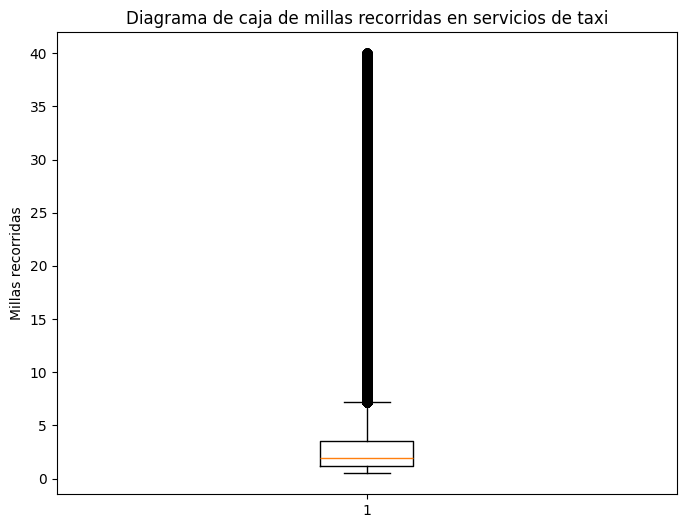

In [79]:
# Crear el diagrama de caja utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df_sin_duplicados['trip_distance'])

# Configurar títulos y etiquetas de ejes
plt.title('Diagrama de caja de millas recorridas en servicios de taxi')
plt.ylabel('Millas recorridas')

# Mostrar el gráfico
plt.show()

### Revisión columna PULocationID

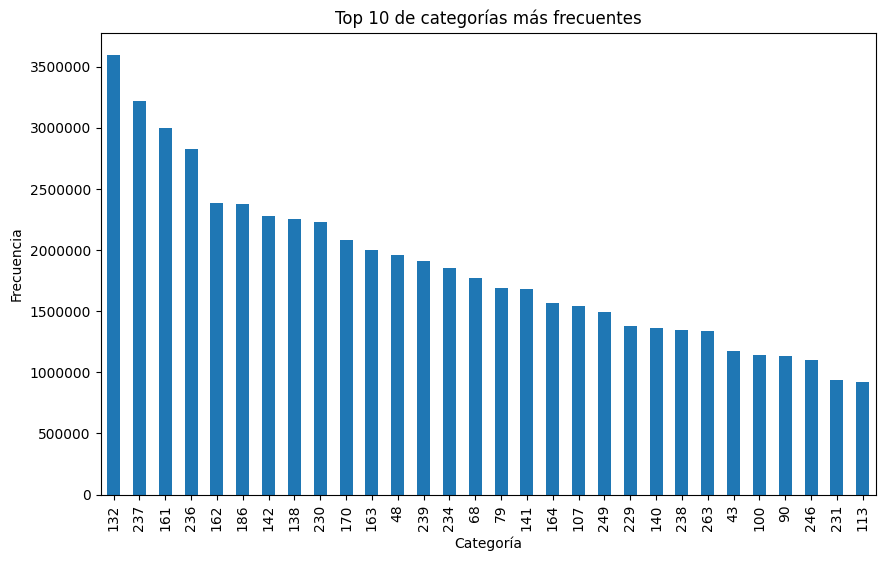

In [86]:
# Obtener el top 10 de categorías más frecuentes
top_10_categorias = df_sin_duplicados['PULocationID'].value_counts().head(30)

# Crear un gráfico de barras para el top 10 de categorías
plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='bar')
plt.title('Top 10 de categorías más frecuentes')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Desactivar la notación científica en el eje Y y mostrar los valores como enteros completos
plt.ticklabel_format(style='plain', axis='y')

plt.show()

### Revisión columna DOLocationID

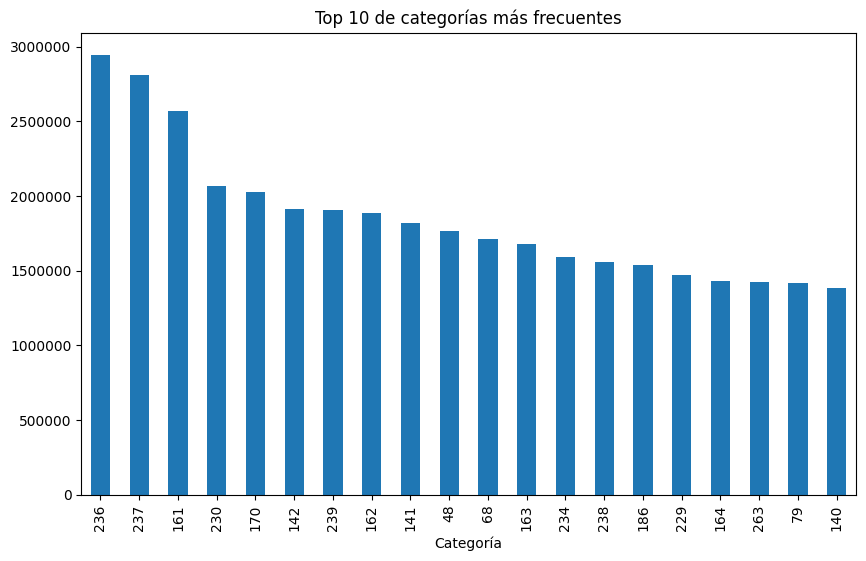

In [89]:
# Obtener el top 10 de categorías más frecuentes
top_10_categorias = df_sin_duplicados['DOLocationID'].value_counts().head(20)

# Crear un gráfico de barras para el top 10 de categorías
plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='bar')
plt.title('Top 10 de categorías más frecuentes')
plt.xlabel('Categoría')

# Desactivar la notación científica en el eje Y y mostrar los valores como enteros completos
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [90]:
# Crear una nueva columna 'key' basada en las combinaciones de PULocationID y DOLocationID
df_sin_duplicados['key'] = df_sin_duplicados['PULocationID'].astype(str) + '_' + df_sin_duplicados['DOLocationID'].astype(str)

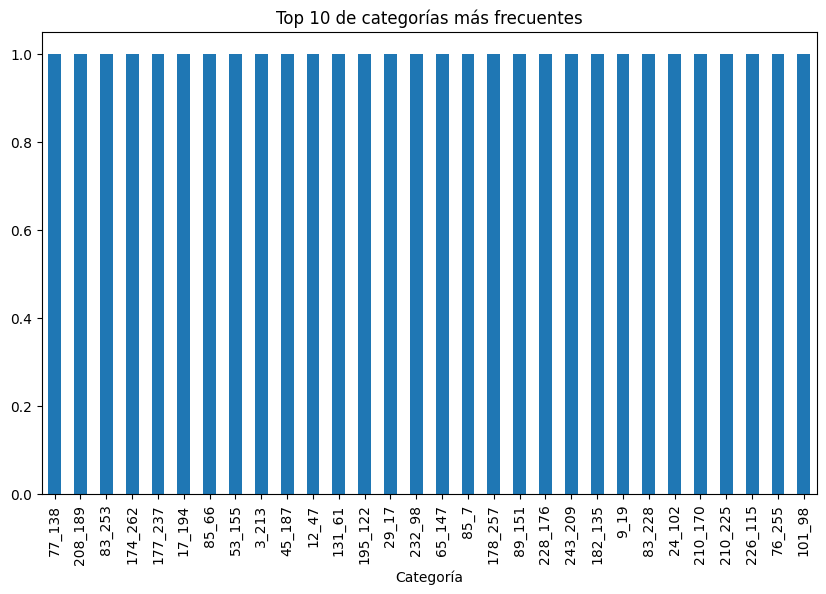

In [94]:
# Obtener el top 10 de categorías más frecuentes
top_10_categorias = df_sin_duplicados['key'].value_counts().tail(30)

# Crear un gráfico de barras para el top 10 de categorías
plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='bar')
plt.title('Top 10 de categorías más frecuentes')
plt.xlabel('Categoría')

# Desactivar la notación científica en el eje Y y mostrar los valores como enteros completos
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [93]:
df_sin_duplicados.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,pickup_hour,duracion_viaje,pickup_date,key
0,1,2,3.80,1,142,236,1,21.95,0,1069,2022-01-01,142_236
1,1,1,2.10,1,236,42,1,13.30,0,504,2022-01-01,236_42
2,2,1,0.97,1,166,166,1,10.56,0,538,2022-01-01,166_166
3,2,1,1.09,1,114,68,2,11.80,0,602,2022-01-01,114_68
4,2,1,4.30,1,68,163,1,30.30,0,2252,2022-01-01,68_163


### Revisión columna payment_type

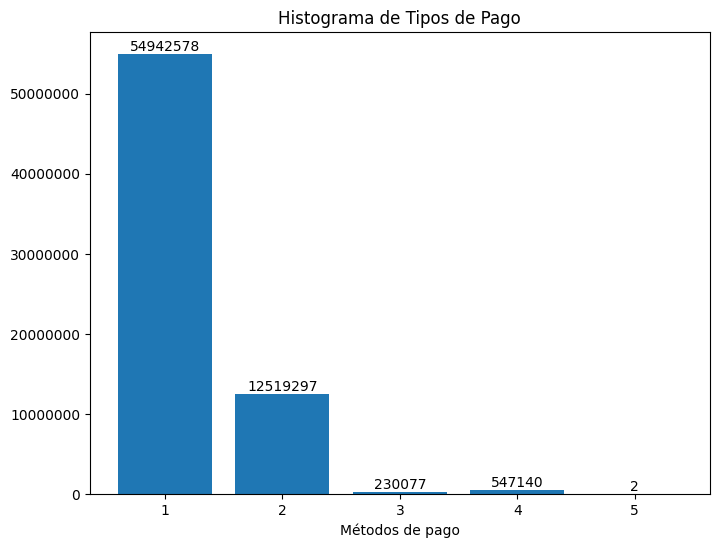

In [95]:
# Calcular la cantidad de ocurrencias de cada valor de payment_type
conteo_pasajeros = df_sin_duplicados['payment_type'].value_counts().reset_index()
conteo_pasajeros.columns = ['payment_type', 'count']

# Crear el histograma utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(conteo_pasajeros['payment_type'], conteo_pasajeros['count'])

# Agregar etiquetas de cantidad en cada barra con un salto de 1 en 1
for index, row in conteo_pasajeros.iterrows():
    plt.annotate(row['count'], xy=(row['payment_type'], row['count']), ha='center', va='bottom')

# Configurar títulos y etiquetas de ejes
plt.title('Histograma de Tipos de Pago')
plt.xlabel('Métodos de pago')

# Establecer el eje x con valores enteros
plt.xticks(range(min(conteo_pasajeros['payment_type']), max(conteo_pasajeros['payment_type']) + 1))

# Desactivar la notación científica en el eje Y y mostrar los valores como enteros completos
plt.ticklabel_format(style='plain', axis='y')

# Mostrar el gráfico
plt.show()

In [97]:
df_sin_duplicados.drop(df_sin_duplicados[df_sin_duplicados['payment_type'] > 2 ].index, inplace=True)

In [99]:
df_sin_duplicados.shape

(67461875, 12)

### Revisión columna total_amount

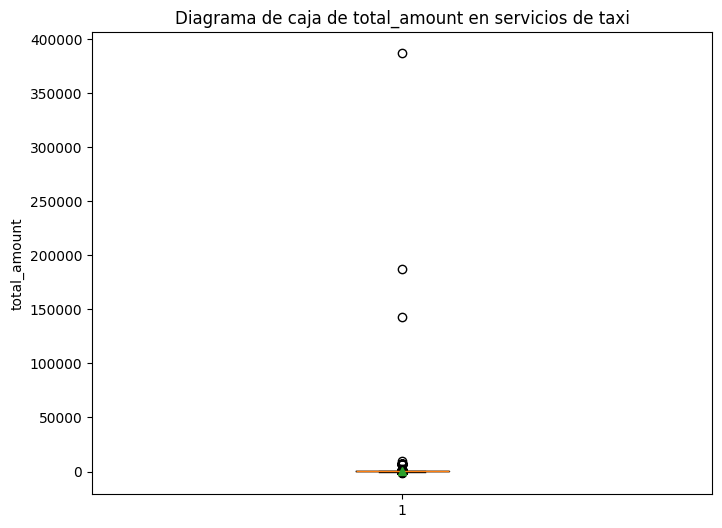

In [101]:
# Crear el diagrama de caja utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df_sin_duplicados['total_amount'], showmeans=True)

# Configurar títulos y etiquetas de ejes
plt.title('Diagrama de caja de total_amount en servicios de taxi')
plt.ylabel('total_amount')

# Mostrar el gráfico
plt.show()

In [102]:
# Calcular la media, mediana, desviación estándar, mínimo y máximo de la columna:  'total_amount'
mean_seconds = df_sin_duplicados['total_amount'].mean()
median_seconds = df_sin_duplicados['total_amount'].median()
std_seconds = df_sin_duplicados['total_amount'].std()
min_seconds = df_sin_duplicados['total_amount'].min()
max_seconds = df_sin_duplicados['total_amount'].max()

# Revisar los resultados
print("Minimo:", min_seconds)
print("Maximo:", max_seconds)
print("Media:", mean_seconds)
print("Mediana:", median_seconds)
print("Desviación estándar:", std_seconds)

Minimo: -1635.8
Maximo: 386987.63
Media: 25.421623952639838
Mediana: 18.59
Desviación estándar: 59.06571990343791


In [103]:
# Calcular los cuartiles para las columna 'total_amount'
cuartiles_total_amount = np.percentile(df_sin_duplicados['total_amount'], [10, 50, 90])
print(cuartiles_total_amount)

[11.3  18.59 50.25]


In [104]:
df_sin_duplicados.drop(df_sin_duplicados[df_sin_duplicados['total_amount'] < 11.3 ].index, inplace=True)
df_sin_duplicados.drop(df_sin_duplicados[df_sin_duplicados['total_amount'] >  50.25 ].index, inplace=True)

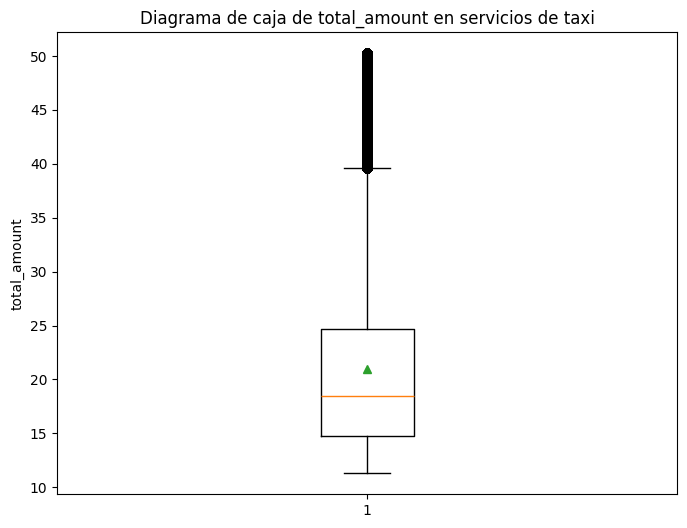

In [105]:
# Crear el diagrama de caja utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df_sin_duplicados['total_amount'], showmeans=True)

# Configurar títulos y etiquetas de ejes
plt.title('Diagrama de caja de total_amount en servicios de taxi')
plt.ylabel('total_amount')

# Mostrar el gráfico
plt.show()

In [108]:
df_sin_duplicados.shape

(54425690, 12)

### Revisión columna pickup_hour

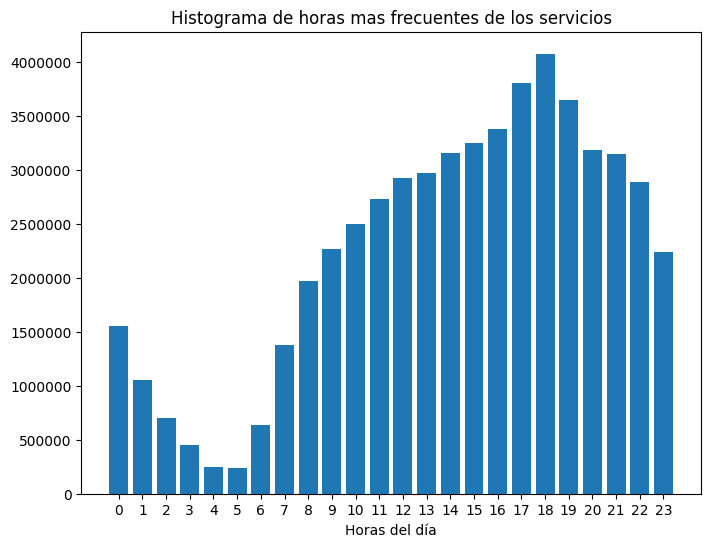

In [109]:
# Calcular la cantidad de ocurrencias de cada valor de pickup_hour
conteo_pasajeros = df_sin_duplicados['pickup_hour'].value_counts().reset_index()
conteo_pasajeros.columns = ['pickup_hour', 'count']

# Crear el histograma utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(conteo_pasajeros['pickup_hour'], conteo_pasajeros['count'])

# Configurar títulos y etiquetas de ejes
plt.title('Histograma de horas mas frecuentes de los servicios')
plt.xlabel('Horas del día')

# Establecer el eje x con valores enteros
plt.xticks(range(min(conteo_pasajeros['pickup_hour']), max(conteo_pasajeros['pickup_hour']) + 1))

# Desactivar la notación científica en el eje Y y mostrar los valores como enteros completos
plt.ticklabel_format(style='plain', axis='y')

# Mostrar el gráfico
plt.show()

### Revisión columna duracion_viaje

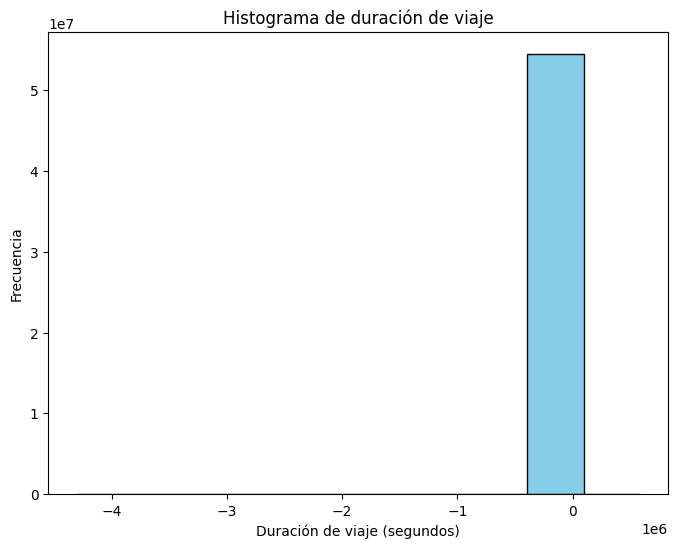

In [110]:
# Crear un histograma de duración de viaje
plt.figure(figsize=(8, 6))
plt.hist(df_sin_duplicados['duracion_viaje'], bins=10, color='skyblue', edgecolor='black')

# Configurar títulos y etiquetas de ejes
plt.title('Histograma de duración de viaje')
plt.xlabel('Duración de viaje (segundos)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

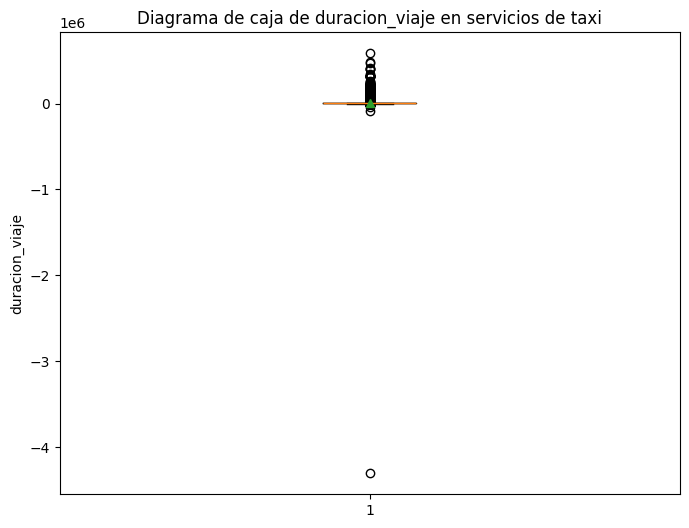

In [111]:
# Crear el diagrama de caja utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df_sin_duplicados['duracion_viaje'], showmeans=True)

# Configurar títulos y etiquetas de ejes
plt.title('Diagrama de caja de duracion_viaje en servicios de taxi')
plt.ylabel('duracion_viaje')

# Mostrar el gráfico
plt.show()

In [112]:
# Calcular la media, mediana, desviación estándar, mínimo y máximo de la columna:  'duracion_viaje'
mean_seconds = df_sin_duplicados['duracion_viaje'].mean()
median_seconds = df_sin_duplicados['duracion_viaje'].median()
std_seconds = df_sin_duplicados['duracion_viaje'].std()
min_seconds = df_sin_duplicados['duracion_viaje'].min()
max_seconds = df_sin_duplicados['duracion_viaje'].max()

# Revisar los resultados
print("Minimo:", min_seconds)
print("Maximo:", max_seconds)
print("Media:", mean_seconds)
print("Mediana:", median_seconds)
print("Desviación estándar:", std_seconds)

Minimo: -4305596
Maximo: 584823
Media: 945.3337317726243
Mediana: 762.0
Desviación estándar: 2659.561139832486


In [113]:
# Calcular los cuartiles para las columnas 'total_amount' y 'duracion_viaje'
cuartiles_total_amount = np.percentile(df_sin_duplicados['duracion_viaje'], [5, 50, 95])
print(cuartiles_total_amount)

[ 310.  762. 1782.]


In [117]:
df_sin_duplicados['trip_distance'].median()

1.9

In [119]:
df_sin_duplicados['trip_distance'].mode()

0    1.2
Name: trip_distance, dtype: float64

In [118]:
df_sin_duplicados['trip_distance'].mean()

2.5263253908218677

In [122]:
print(df_sin_duplicados['duracion_viaje'].median())
print(df_sin_duplicados['duracion_viaje'].mean())
print(df_sin_duplicados['duracion_viaje'].mode())


762.0
945.3337317726243
0    532
Name: duracion_viaje, dtype: int32


In [114]:
# Contar los registros con duración de viaje inferior a 0.69 
registros_inferiores_a_cero = df_sin_duplicados[df_sin_duplicados['duracion_viaje'] < 310 ]
cantidad_registros_inferiores_a_cero = len(registros_inferiores_a_cero)
print("Cantidad de registros con duracion_viaje inferior a 0.69 :", cantidad_registros_inferiores_a_cero)

Cantidad de registros con duracion_viaje inferior a 0.69 : 2700769


In [124]:
# Contar los registros con duración de viaje inferior a 0.69 
registros_inferiores_a_cero = df_sin_duplicados[df_sin_duplicados['duracion_viaje'] > 2700 ]
cantidad_registros_inferiores_a_cero = len(registros_inferiores_a_cero)
print("Cantidad de registros con duracion_viaje inferior a 0.69 :", cantidad_registros_inferiores_a_cero)

Cantidad de registros con duracion_viaje inferior a 0.69 : 253019


In [125]:
df_sin_duplicados.drop(df_sin_duplicados[df_sin_duplicados['duracion_viaje'] < 310 ].index, inplace=True)
df_sin_duplicados.drop(df_sin_duplicados[df_sin_duplicados['duracion_viaje'] >  2700 ].index, inplace=True)

In [126]:
df_sin_duplicados.shape

(51471902, 12)

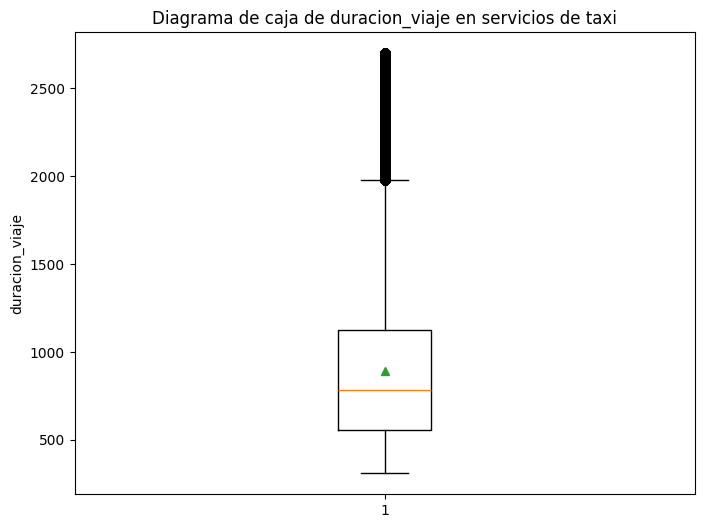

In [127]:
# Crear el diagrama de caja utilizando Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df_sin_duplicados['duracion_viaje'], showmeans=True)

# Configurar títulos y etiquetas de ejes
plt.title('Diagrama de caja de duracion_viaje en servicios de taxi')
plt.ylabel('duracion_viaje')

# Mostrar el gráfico
plt.show()

In [128]:
df_sin_duplicados.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,pickup_hour,duracion_viaje,pickup_date,key
0,1,2,3.80,1,142,236,1,21.95,0,1069,2022-01-01,142_236
1,1,1,2.10,1,236,42,1,13.30,0,504,2022-01-01,236_42
3,2,1,1.09,1,114,68,2,11.80,0,602,2022-01-01,114_68
4,2,1,4.30,1,68,163,1,30.30,0,2252,2022-01-01,68_163
6,2,1,5.07,1,233,87,1,26.00,0,848,2022-01-01,233_87


In [130]:
# Calcular la media, mediana, desviación estándar, mínimo y máximo de la columna:  'duracion_viaje'
mean_seconds = df_sin_duplicados['duracion_viaje'].mean()
median_seconds = df_sin_duplicados['duracion_viaje'].median()
std_seconds = df_sin_duplicados['duracion_viaje'].std()
min_seconds = df_sin_duplicados['duracion_viaje'].min()
max_seconds = df_sin_duplicados['duracion_viaje'].max()

# Revisar los resultados
print("Minimo:", min_seconds)
print("Maximo:", max_seconds)
print("Media:", mean_seconds)
print("Mediana:", median_seconds)
print("Desviación estándar:", std_seconds)

Minimo: 310
Maximo: 2700
Media: 890.7433925795087
Mediana: 786.0
Desviación estándar: 438.15242238574285


In [45]:
# Calcular la media, mediana, desviación estándar, mínimo y máximo de la columna:  'total_amount'
mean_seconds = ['total_amount'].mean()
median_seconds = df_sin_duplicados['total_amount'].median()
std_seconds = df_sin_duplicados['total_amount'].std()
min_seconds = df_sin_duplicados['total_amount'].min()
max_seconds = df_sin_duplicados['total_amount'].max()

# Revisar los resultados
print("Minimo:", min_seconds)
print("Maximo:", max_seconds)
print("Media:", mean_seconds)
print("Mediana:", median_seconds)
print("Desviación estándar:", std_seconds)

Minimo: 11.76
Maximo: 32.15
Media: 18.877393739474105
Mediana: 18.0
Desviación estándar: 4.832697898799998


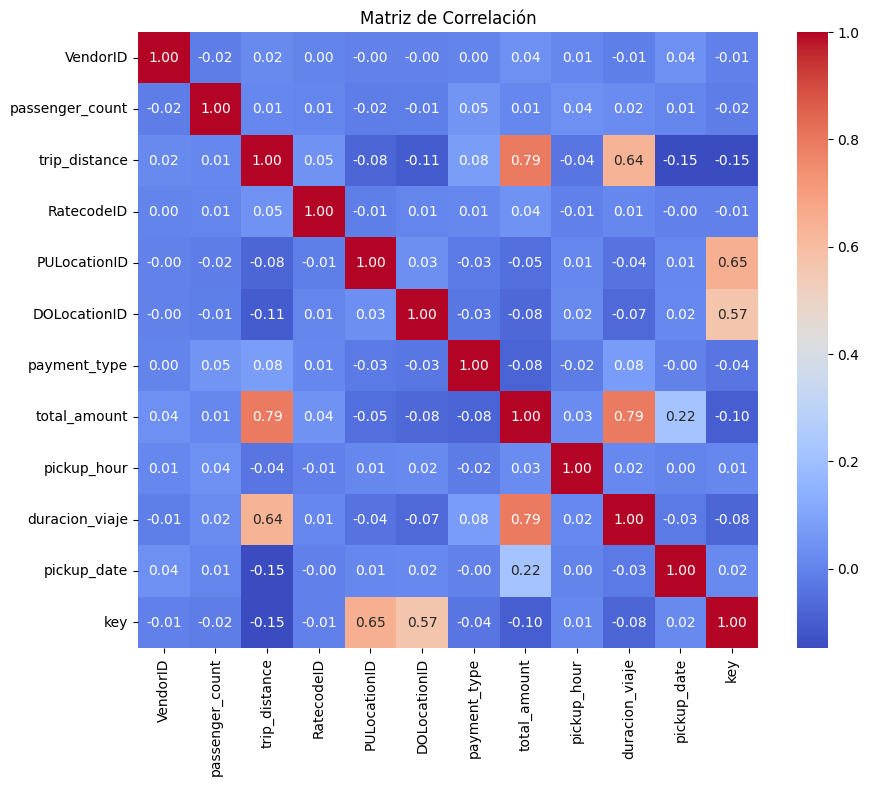

In [131]:
# Calcula la matriz de correlación
matriz_correlacion = df_sin_duplicados.corr()

# Crea un mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlación')
plt.show()

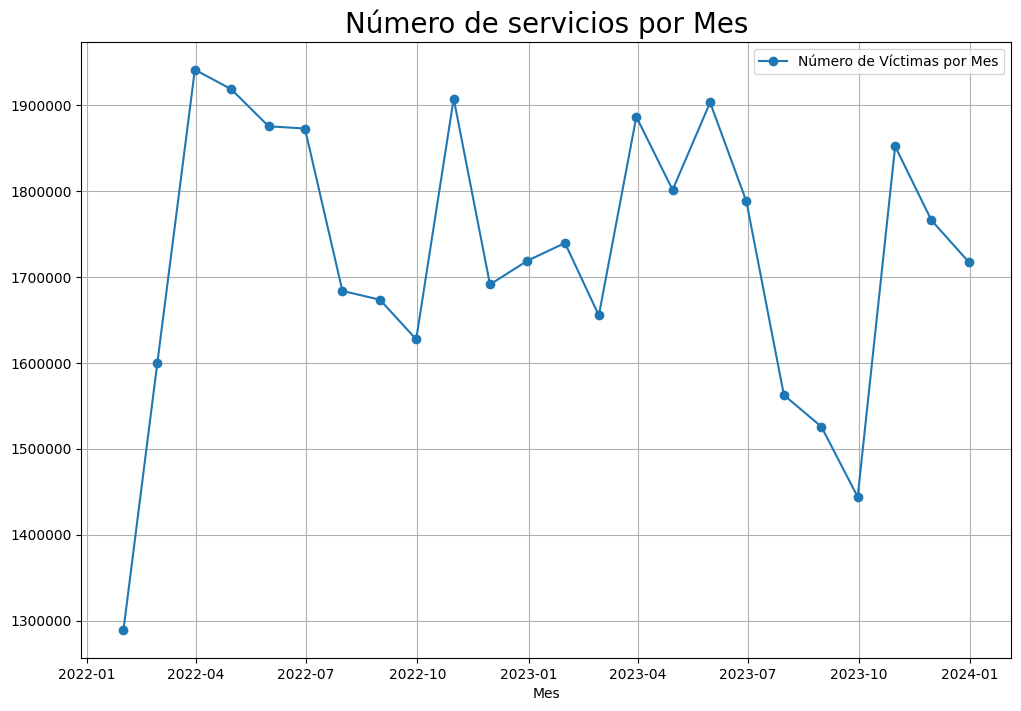

In [54]:
df_sin_duplicados['pickup_date'] = pd.to_datetime(df_sin_duplicados['pickup_date'])
grouped_data = df_sin_duplicados.resample('M', on='pickup_date').agg({'VendorID': 'count'}).reset_index()

plt.figure(figsize=(12, 8))
plt.plot(grouped_data['pickup_date'], grouped_data['VendorID'], label='Número de Víctimas por Mes', marker='o')
plt.title('Número de servicios por Mes', fontsize=20)
plt.xlabel('Mes')

# Desactivar la notación científica en el eje Y y mostrar los valores como enteros completos
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(True)
plt.show()

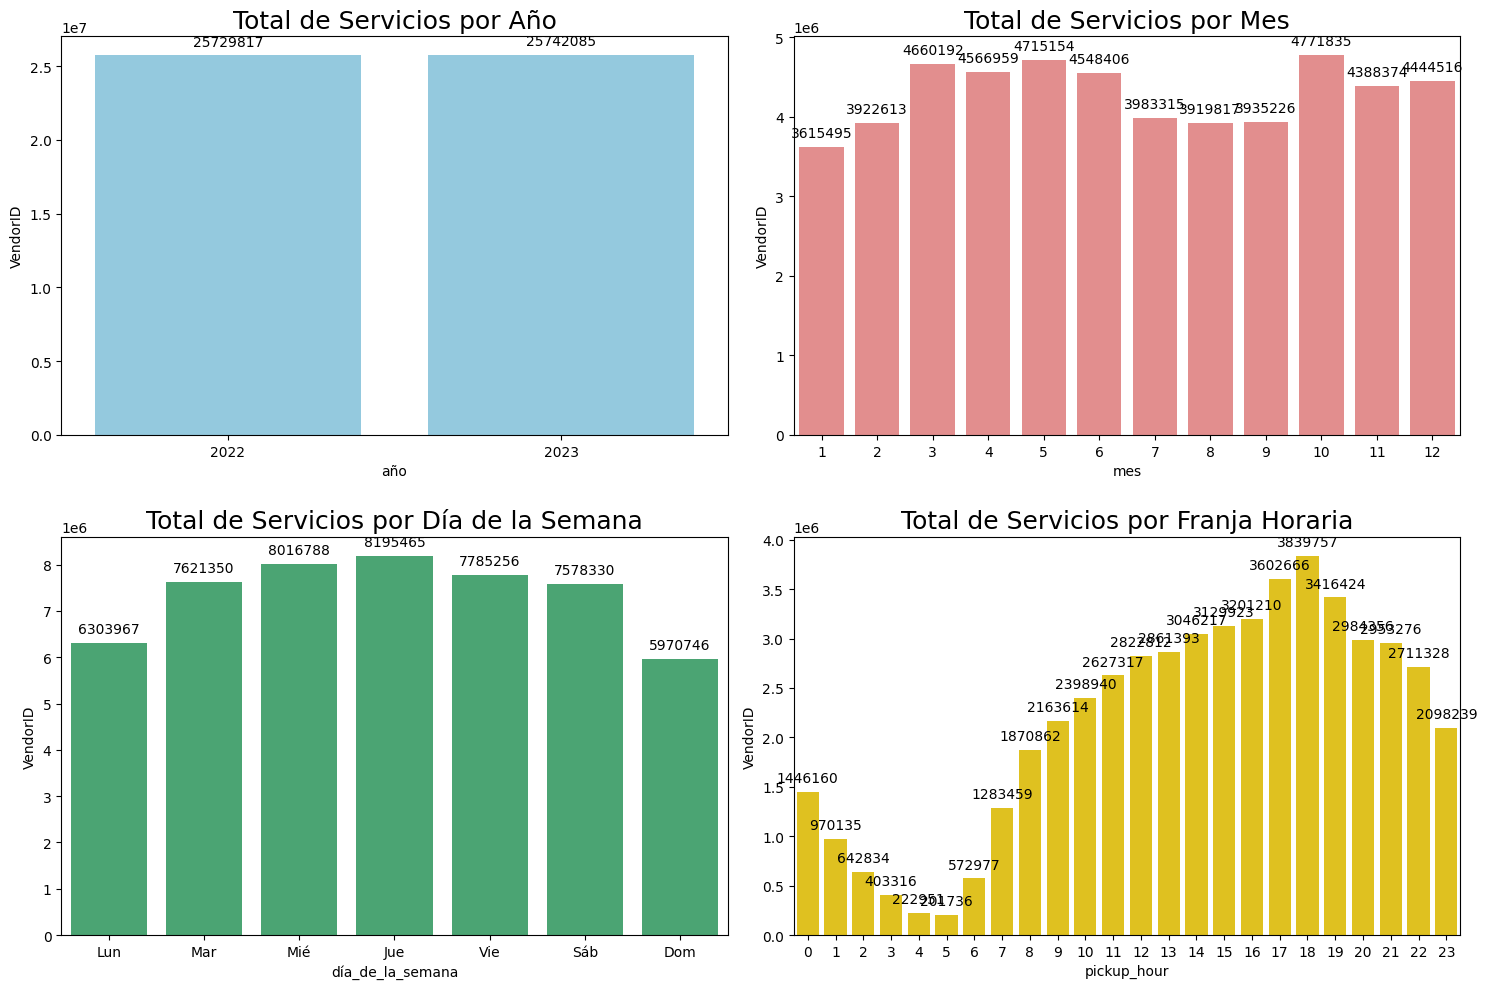

In [132]:
df_sin_duplicados['pickup_date'] = pd.to_datetime(df_sin_duplicados['pickup_date'])
df_sin_duplicados['año'] = df_sin_duplicados['pickup_date'].dt.year
df_sin_duplicados['mes'] = df_sin_duplicados['pickup_date'].dt.month
df_sin_duplicados['día_de_la_semana'] = df_sin_duplicados['pickup_date'].dt.day_name()

victimas_por_año = df_sin_duplicados.groupby('año')['VendorID'].count().reset_index()
victimas_por_mes = df_sin_duplicados.groupby('mes')['VendorID'].count().reset_index()
victimas_por_día_de_la_semana = df_sin_duplicados.groupby('día_de_la_semana')['VendorID'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
victimas_por_franja_hora = df_sin_duplicados.groupby('pickup_hour')['VendorID'].count().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='año', y='VendorID', data=victimas_por_año, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Total de Servicios por Año', fontsize=18)
for p in axs[0, 0].patches:
    axs[0, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.barplot(x='mes', y='VendorID', data=victimas_por_mes, ax=axs[0, 1], color='lightcoral')
axs[0, 1].set_title('Total de Servicios por Mes', fontsize=18)
for p in axs[0, 1].patches:
    axs[0, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.barplot(x='día_de_la_semana', y='VendorID', data=victimas_por_día_de_la_semana, ax=axs[1, 0], color='mediumseagreen')
axs[1, 0].set_title('Total de Servicios por Día de la Semana', fontsize=18)
axs[1, 0].set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
for p in axs[1, 0].patches:
    axs[1, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.barplot(x='pickup_hour', y='VendorID', data=victimas_por_franja_hora, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Total de Servicios por Franja Horaria', fontsize=18)
for p in axs[1, 1].patches:
    axs[1, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

In [133]:
df_sin_duplicados.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,pickup_hour,duracion_viaje,pickup_date,key,año,mes,día_de_la_semana
0,1,2,3.80,1,142,236,1,21.95,0,1069,2022-01-01,142_236,2022,1,Saturday
1,1,1,2.10,1,236,42,1,13.30,0,504,2022-01-01,236_42,2022,1,Saturday
3,2,1,1.09,1,114,68,2,11.80,0,602,2022-01-01,114_68,2022,1,Saturday
4,2,1,4.30,1,68,163,1,30.30,0,2252,2022-01-01,68_163,2022,1,Saturday
6,2,1,5.07,1,233,87,1,26.00,0,848,2022-01-01,233_87,2022,1,Saturday


In [134]:
df_sin_duplicados.dtypes

VendorID                     int32
passenger_count              int32
trip_distance              float64
RatecodeID                   int32
PULocationID                 int32
DOLocationID                 int32
payment_type                 int32
total_amount               float64
pickup_hour                  int32
duracion_viaje               int32
pickup_date         datetime64[ns]
key                         object
año                          int32
mes                          int32
día_de_la_semana            object
dtype: object